# HABERMAN'S SURVIVAL

## Data Description

*The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.*

### Attribute Information

    1. Age of patient at time of operation (numerical)
    2. Patient's year of operation (year - 1900, numerical)
    3. Number of positive axillary nodes detected (numerical)
    4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [3]:
#Import Necessary Libraries/Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading the file
df = pd.read_csv('/home/sampath/Documents/Haberman-Cancer-Survival-Dataset-master/haberman.csv')

In [6]:
#check the top 5 rows
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


#### Findings:
    1. Column names are missing in the dataset and hence adding the column names

In [7]:
#Renaming the column names as its too big
df.columns = ['Age','Year','Nodes','Survival_status']
df.head()

,Age,Year,Nodes,Survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [8]:
#Finding total number of datapoints(rows) and columns in our dataset
df.shape

(305, 4)

In [9]:
#Checking if there are any null values
df.isnull().sum()

Age                0
Year               0
Nodes              0
Survival_status    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                305 non-null int64
Year               305 non-null int64
Nodes              305 non-null int64
Survival_status    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [11]:
#Checking if the data is Balanced or Imbalanced
df['Survival_status'].value_counts()

1    224
2     81
Name: Survival_status, dtype: int64

#### Findings:
    1. There are 305 rows(data-points) and 4 columns(Features).
    2. There are no null values in the dataset.
    3. All the columns are of type int.
    4. There are 224 survival records and 81 not survived records in the given dataset. Hence it is clear that 
       the given dataset is imbalanced.

In [12]:
df.describe()

,Age,Year,Nodes,Survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Findings
    1. Age range of patients are between 30 to 83 with median of 52.
    2. Nodes range from 0 to 52.
    3. 75% of patients have nodes less than 5 and 25% of the patients have 0 nodes.

## BI-VARIATE ANALYSIS

### 2-D SCATTER PLOT

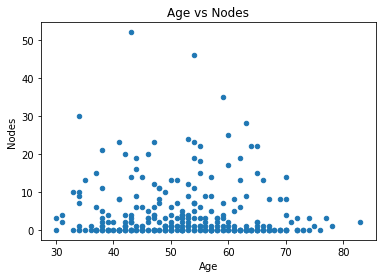

In [13]:
df.plot(kind='scatter', x='Age', y='Nodes') ;
plt.title('Age vs Nodes')
plt.show()

#### Findings:
    1. Most of the people have 0 nodes.

### 2-D SCATTER PLOT WITH COLOR-CODING

/home/sampath/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


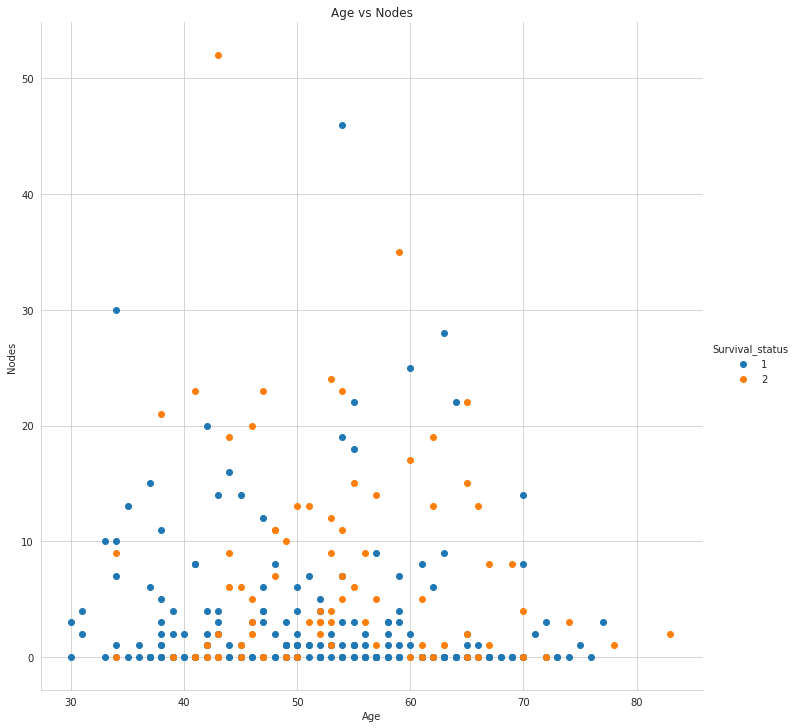

In [14]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Survival_status', size = 10) \
.map(plt.scatter,'Age','Nodes').add_legend()

plt.title('Age vs Nodes')
plt.show()

#### Findings:
    1. Most of the patients have 0 Nodes.
    2. Blue(Survived) and Orange(not survived) points are not well seperated, so we cannot make any decision by looking at this Age vs Nodes graph regarding the patient survival.
    3. Hence we need to check the pair/combination of features to make good desicion/combination.
    4. Number of combination of features is 3C2 = 3, which will plot using Pair-plot.

## Pair-Plot

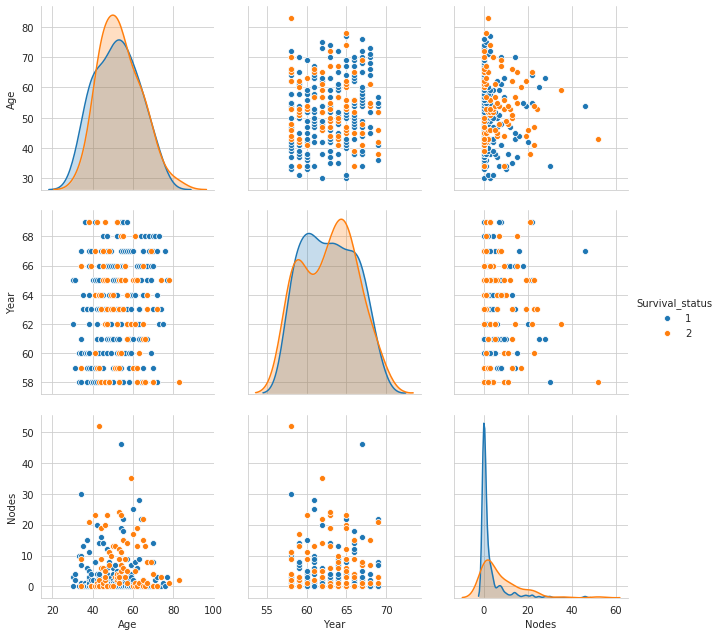

In [15]:
#Analyzing data using pair plots
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'Survival_status', height = 3, vars = ['Age','Year','Nodes'])
plt.show()

#### Finding_2:
    1. Age between 30 to 40 and year of operation between 58(approx) to 65 has quite good survival_status who survived
    2. Nodes signififies the Survival_status
        2.1 Lesser the number of nodes higher the chance of patient being survived.
        2.2 Higher the number of nodes lesser the chance of patient being survived.

## UNIVARIATE ANALYSIS

### HISTOGRAM, PDF, CDF

#### 1. 'AGE'

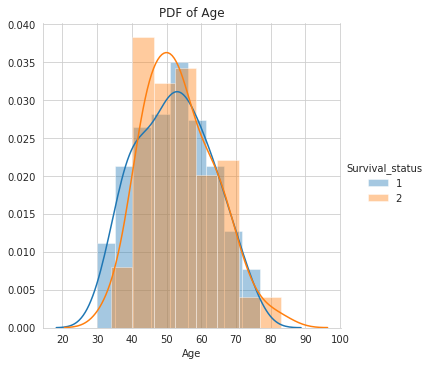

In [58]:
#Drawing Histogram and understanding effect Age
sns.FacetGrid(df,hue='Survival_status',height=5).map(sns.distplot,'Age').add_legend()
plt.title('PDF of Age')
plt.show()

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


Text(0.5, 0, 'Age')

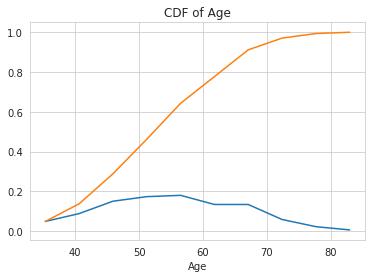

In [16]:
#plotting CDF
count, bin_edges = np.histogram(df['Age'], bins=10, density = True)
pdf = count/(sum(count))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('CDF of Age')
plt.xlabel('Age')

#Note: I have selected bins as 10 since it has quite less number of data points. We can select any data points in the range of 5 to 20.

#### Finding_3:
    1. There are approx 95% of the people below age group of 70.
    
*Note : This is just finding from above graph, age is not an significant factor to distinguish between survival_status as seen clearly from the pairplot graph*

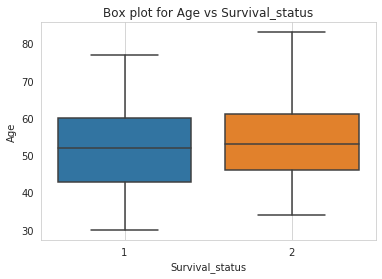

In [60]:
#plotting boxplot
sns.boxplot(x='Survival_status', y='Age', data= df)
plt.grid()
plt.title('Box plot for Age vs Survival_status')
plt.show()

#### Finding_4:
        1. People who are in the range between 30 to 35(Approx) irrespective of Year_of_operation and Positive_nodes have                  survived.
        2. People whose age is above 75 irrespective of Year_of_operation and Positive_nodes have not survived.

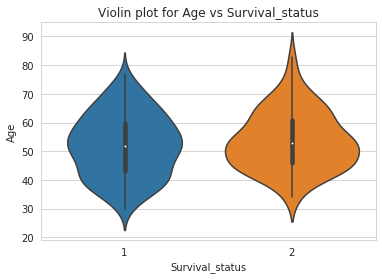

In [61]:
sns.violinplot(x='Survival_status',y='Age',data = df , size = 6)
plt.title('Violin plot for Age vs Survival_status')
plt.show()

### 2. Year

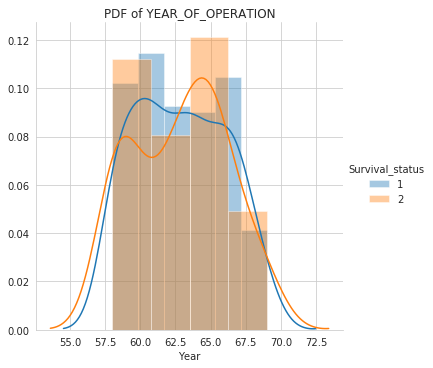

In [62]:
sns.FacetGrid(df,hue='Survival_status',height=5).map(sns.distplot,'Year').add_legend()
plt.title('PDF of YEAR_OF_OPERATION')
plt.show()

[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


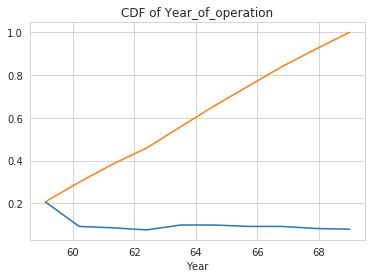

In [63]:
#plotting cdf
count,bin_edges = np.histogram(df['Year'], bins = 10, density = True)
pdf = count/(sum(count))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('CDF of Year_of_operation')
plt.xlabel('Year')
plt.show()

### Finding_4:
    1. Almost 79% of people had undergone operation in the year range 1958 to 1966
*Note: Again the above info is just for understanding as this data will not help us in understanding the survival status*

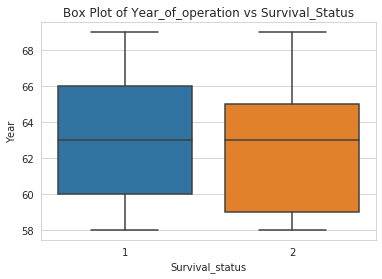

In [64]:
#Box plot
sns.boxplot(x='Survival_status', y='Year', data= df)
plt.title('Box Plot of Year_of_operation vs Survival_Status')
plt.show()

*From the above boxplot it is hard to retrive any information*

Text(0.5, 1.0, 'Violin Plot of Year_of_operation vs Survival_Status')

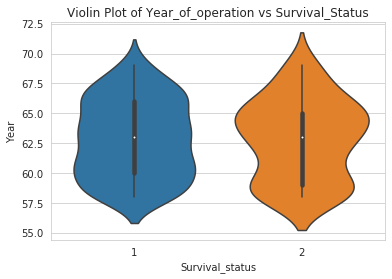

In [65]:
sns.violinplot(x='Survival_status',y='Year',data=df ,size= 6)
plt.title('Violin Plot of Year_of_operation vs Survival_Status')

### Finding_5:

    1. From the above graphs we were not able to retrive any kind of information regarding survival_status hence we can say Year_of_operation doesnot play any significant role in identifying the Survival_status

### 3. Nodes

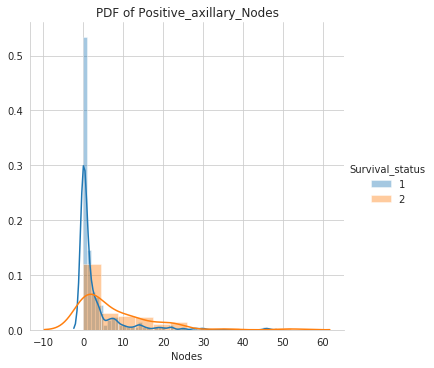

In [66]:
sns.FacetGrid(df,hue='Survival_status',height=5).map(sns.distplot,'Nodes').add_legend()
plt.title('PDF of Positive_axillary_Nodes')
plt.show()

#### Finding_5:
    1. From the above graph we can say that there are approx 55% of people survived having Positive_Lymph_nodes between 0-2 and around 12% of people who died as well having nodes in this range
    2. If positive nodes is higher then there is less chance of patient being survived.
    3. Most of the people have zero positive_Lymph_nodes.

[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


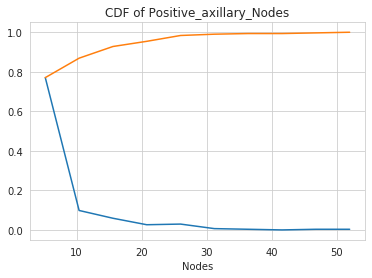

In [67]:
#cdf
count,bin_edges = np.histogram(df['Nodes'],bins=10,density= True)
pdf = count/(sum(count))
print(pdf)
print(bin_edges)

cdf =np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Nodes')
plt.title('CDF of Positive_axillary_Nodes')
plt.show()

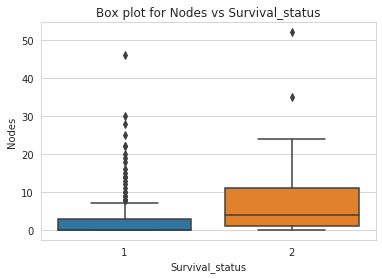

In [68]:
#boxplot
sns.boxplot(x='Survival_status',y='Nodes', data=df)
plt.title('Box plot for Nodes vs Survival_status')
plt.show()

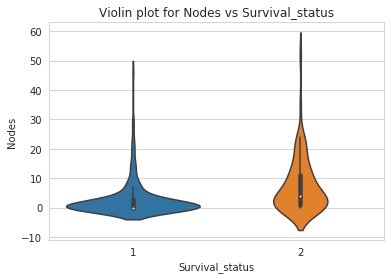

In [69]:
sns.violinplot(x='Survival_status',y='Nodes',data=df ,size=6)
plt.title('Violin plot for Nodes vs Survival_status')
plt.show()

In [70]:
#Drawing PDF and CDF for survival status
Survived = df.loc[df['Survival_status'] == 1]
Died = df.loc[df['Survival_status'] == 2]

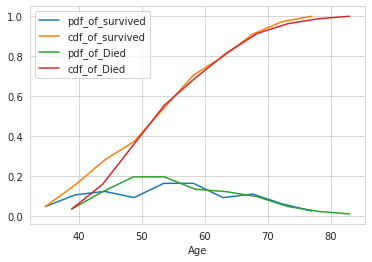

In [71]:
count,bin_edges = np.histogram(Survived['Age'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
label = ['pdf_of_survived','cdf_of_survived','pdf_of_Died','cdf_of_Died']


count,bin_edges = np.histogram(Died['Age'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Age')
plt.legend(label)

plt.show()

### Finding_6:
    1. Almost 15% of the people among survived have age less than 36(Approx)
    2. After age above 75 we can see there is a high chance of death.
    3. The number of nodes from 0 to 5 is highly densed.

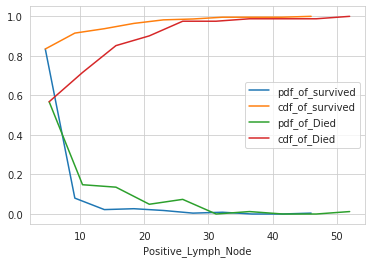

In [72]:
count,bin_edges = np.histogram(Survived['Nodes'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
label = ['pdf_of_survived','cdf_of_survived','pdf_of_Died','cdf_of_Died']


count,bin_edges = np.histogram(Died['Nodes'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Positive_Lymph_Node')
plt.legend(label)

plt.show()

### Finding_7:
    1. People having positive_lymph_node more than 46 have died.

## Contour plot

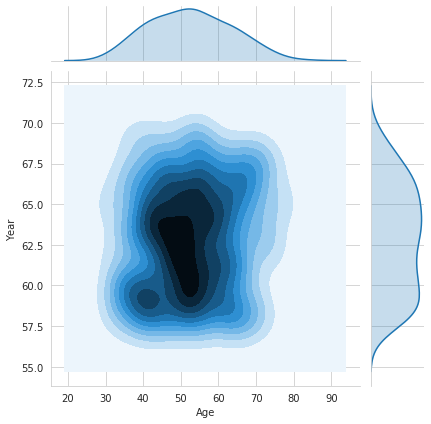

In [73]:
sns.jointplot(x="Age", y="Year", data=df, kind="kde");
plt.show()

#### Findings:
    1. There are more number of people who have undergone operation during the year 59-64 and between the ages    42-64

### CONCLUSION:


- The given dataset is Imbalanced since there is no equal number of Observation for our Dependent Variable
- We cannot differentiate our Dependent Variable since all the Independent Variables have overlapping.

### OBSERVATIONS:

    1.  People who are in the AGE range between 30 to 35(Approx) irrespective of Year_of_operation and Positive_nodes have survived.
    2.  People whose age is above 75 irrespective of Year_of_operation and Positive_nodes have not survived.
    3.  From the above graph we can say that there are approx 55% of people survived having Positive_Lymph_nodes between 0-2 and around 12% of people who died as well having nodes in this range.
    4.  If positive nodes is higher then there is less chance of patient being survived.
    5.  Most of the people have zero positive_Lymph_nodes.
    6.  Almost 15% of the people among survived have age less than 36(Approx).
    7.  After age > 75 we can see there is a high chance of death.
    8.  People having positive_lymph_node more than 46 have died.
    9.  Age between 30 to 40 and year of operation between 58(approx) to 65 has quite good survival_status who survived.
    10. Lesser the number of nodes higher the chance of patient being survived.
    11. Higher the number of nodes lesser the chance of patient being survived.
    12. There are more number of people who have undergone operation during the Year_of_operation 59-64 and between the ages 42-64.
    